# EC523: **Problem Set 2**


---

This assignment will introduce you to:
1. Understanding the power of ReLU activation.
2. Implementing your own autograd.
3. Implementing a simple MLP.
4. Basic functionality in PyTorch

$$
\\
$$

**Instructions:**

To run and solve this assignment, one must have a working Jupyter Notebook (.ipynb) installation. The easiest way to do this is using [Google Colab](https://colab.research.google.com/), an online Jupyter notebook environment with a nice interface and free (but limited) compute resources.

For written questions, we highly encourage students to type their mathematical derivations in the cells marked <font color='blue'>**Qx.x Solution**</font> using LaTeX (most common LaTeX packages are preinstalled on Google Colab). However, you may also write your solutions by hand and scan them digitally. Please note that points may be deducted for illegible solutions.

$$
\\
$$

**Submission:**
1. In the top menu bar, click **Runtime $\rightarrow$ Run all**. A lot of the cells in this assignment will produce very different results if run twice in a row, so this is the best way to avoid this issue.
2. Please upload the original .ipynb file and .pdf file to [Gradescope](https://www.gradescope.com/courses/718724) (Entry code: NPVN7W) by **11:59PM on Tuesday, February 20, 2024**. If you have any written solutions, please add these to your pdf file. Upon submission, please use Gradescope's functionality to assign which questions go with which pages.

---
# **Question 1:** Universal approximation power of ReLU networks (25 points)

As we dicussed in class, a two layer Neural Network (i.e., a single hidden layer) with sigmoid activation function is a universal approximator. That is, with sufficient hidden units, it can approximate any smooth, real function with desired accuracy. In this problem we want to demonstrate universal approximation power of NNs using ReLU activation units.  The setup is analogous to the sigmoid case, where we have a linear mapping with bias, followed by a componentwise ReLU activation, followed by another linear mapping with no bias.

## **Q1.1**

Show that, by composing only 2 hidden units in a ReLU network, i.e. $\hat{y} = \sum_{i=1}^2a_i\ \max (0,b_ix+c_i)$, we can build an approximation to the step function $1[x>0]$.
The approximator should have value 1 for all values larger than some positive value $\delta$ and decreasing linearly for any value between 0 and $\delta$.

#### <font color='blue'>**Q1.1 Solution**:</font>
**Double click here to add solution**


compound relu of 2 functions
- i = 1; +1 slope from 0 to delta

    $ 1 * \max (0,x)$

- i = 2; -1 slope when first reaches delta

    $ -1 * \max (0,x-δ)$

- $\hat{y} = \sum_{i=1}^2a_i\ \max (0,b_ix+c_i)$
$ $

## **Q1.2**

Show that by composing 4 hidden units in a ReLU network; we can build an approximation to the unit impulse function of duration $\delta$

\begin{equation}
u_\delta(x) = 1[0\leq x\leq \delta]
\end{equation}

The approximator should have value $1$ between $\frac{\delta}{4}$ and $\frac{3\delta}{4}$ and should be increasing/decreasing on either side of this for a duration of $\frac{\delta}{2}$, i.e., it should be 0 for all values less than $\frac{-\delta}{4}$ and more than $\frac{5\delta}{4}$

#### <font color='blue'>**Q1.2 Solution**:</font>
**Double click here to add solution**

4 functions
- function goes from 0 to 1 over a distance of δ/2 => slope = 2/δ
- positive slope start at -δ/4

    $2/δ\max (0,x+δ/4)$

- negative slope start at δ/4

    $-2/δ\max (0,x-δ/4)$

- negative slope start at 3δ/4

    $-2/δ\max (0,x-3δ/4)$

- positive slope start at 5δ/4

    $2/δ\max (0,x-5δ/4)$

$ $



## **Q1.3**
Using your approximator for the unit impulse function in **Q1.2**, complete the code below to draw the approximator for different duration values $\delta$.

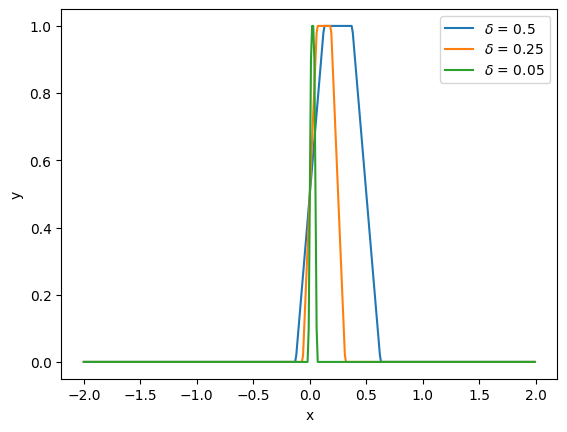

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

def hat_u_delta(x,delta):
    ## -- ! code required
    #output = np.zeros(x.shape)
    #output = relu(x-delta/4) + relu(x+delta/4) - relu(x+3*delta/4) + relu(x+5*delta/4)

    #output = relu(x+delta/4) - relu(x-delta/4) - relu(x-3*delta/4) + relu(x-5*delta/4)

    #print("x,delta")
    #print(x)
    #print(delta)
    #print("output")
    #print(output)

    #if delta == 0:
    #    return x*0
    return 2/delta*(relu(x+delta/4) - relu(x-delta/4) - relu(x-3*delta/4) + relu(x-5*delta/4))


def draw_impulse(deltas):
    x = np.arange(-2, 2, 0.01).reshape((-1,1))
    for delta in deltas:
        plt.plot(x,hat_u_delta(x,delta))
    plt.legend(['$\delta$ = 0.5', '$\delta$ = 0.25', '$\delta$ = 0.05']);
    plt.xlabel('x')
    plt.ylabel('y');

draw_impulse([0.5, 0.25, 0.05])

## **Q1.4**
Imagine the idea of Riemann integral, where we approximate the integrand function with unit impulse functions (Fig. 1).
We will approximate the function $f(x)$ defined over $[a,b]$, using N impulse functions as follows:

$$\hat{f(x)} = \sum_{i=0}^{N-1} f(a + i \delta)\, u_\delta(x-i\delta), $$
where: $$\delta = \lfloor \frac{b-a}{N} \rfloor$$

![riemann-gif](https://drive.google.com/uc?id=1nY1BHbbEpdm7OE3USfc0BhbbEWlTmsvv)

Using your implemented approximator for unit impulse function in **Q1.2**; complete the code given bellow to approximate the $sin(x)$ function over $[0, 2\pi]$. The code will plot the approximation for different number of impulse functions $N$.

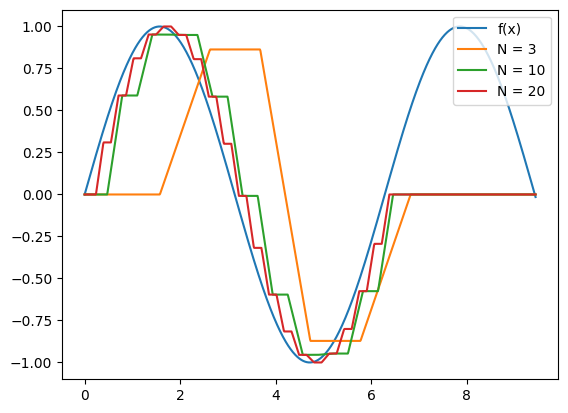

In [4]:
def f(x):
    return np.sin(x)

def hat_f(x,N,a,b):
    #prints impulse functions starting at x by shifting the impulse to x
    #print("x N a b")
    #print(x) #x matrix
    #print(N) #3
    #print(a) #0
    #print(b) #2pi
    xrange = np.linspace(a,b,N+1)
    #print(xrange)
    delta = (b - a)/(N)
    f_hat = np.zeros((x.shape[0], x.shape[1]))


    for i in range(0,N):
            f_hat = f_hat + f(a + i*delta) * hat_u_delta(x- i * delta,delta)
    #print(f_hat)

    return f_hat


    """
    xrange = np.linspace(a,b,N)
    print("xrange")
    print(xrange)

    #delta = np.floor((b - a)/(N))
    delta = (b - a)/(N)

    idelta = np.zeros(N-1)
    for i in range(0,N-1):
        idelta[i] = i*delta

    #floordelta = np.floor(idelta)

    newdelta = idelta[idelta[:]!=0]
    print("idelta conversion")
    print(idelta)
    #print(floordelta)
    print(newdelta)

    faidelta = f(a+newdelta)
    print("faidelta")
    print(faidelta)

    u_delta = hat_u_delta(x,newdelta)
    print("u_delta")
    print(u_delta)

    output = np.sum(faidelta*u_delta,axis = 1)
    print("output")
    print(output)
    return output
    """

    """
    #number of impulses to create
    #evaluate at each x(N) to get the height to pulse at
    xrange = np.linspace(a,b,N+1)
    xval = f(xrange)
    #print("xrange")
    #print(xrange)
    #print(xval)

    #DON'T FORGET TO FLOOR
    delta = np.floor((b - a)/(N+1))

    x_delta =  hat_u_delta(x,delta)

    xout = np.zeros(x.shape)
    currentindex = 0
    for i in range(0,x.shape[0]):
        #if currentindex == 0:
        #    xout[i] = x_delta[i]
        #elif currentindex < xrange.shape[0]:
        if currentindex < xrange.shape[0]:
            xout[i] = xval[currentindex]
        else:
            xout[i] = xval[xrange.shape[0] - 1]
        if currentindex < xrange.shape[0]-1:
            if x[i] > xrange[currentindex+1]:
                currentindex = currentindex + 1

    return xout
    #hight corrected impulse
    xdelta = np.zeros((x[0], N))

    for i in xdelta.shape[1]:
        xdelta[:,i] = hat_u_delta(x,abn)*xrange[i]
    print(xout)

    # x correct impulse
    xshifted = np.zeros((x[0], n))

    for i in xdelta.shape[0]:
        for j in xdelta.shape[1]:
            if x[i] > j * abn - .25 * abn:
                xshifted[i] =
            if x[i] > j * abn + .25 * abn:

            if x[i] > j * abn + .75 * abn:

            if x[i] > j * abn + 1.25 * abn:



    xout = max(xout)
    print(xout)
    return xout

    #change the hat_u_delta f() function to be a width to use and not a value
    xthreshold = hat_u_delta(xrange,f(xrange))
    print("xthreshold")
    print(xthreshold)
    output = np.zeros(x.shape)
    currentindex = 0
    print(xthreshold.shape)
    for i in range(0,x.shape[0]-1):
        if currentindex == xthreshold.shape[0]-1:
            pass
        elif x[i] >= xthreshold[currentindex+1]:
            currentindex = currentindex + 1
        output[i] = xthreshold[currentindex]

    for i in range(0, x.shape[0]-1):
        for j in range(1, xthreshold.shape[0]-1):
            if j + 1 > xthreshold.shape[0]:
                output[i] = xthreshold[j]
            elif x[i] < xthreshold[j]:
                output[i] = xthreshold[j-1]
            else:
                break
    print(output)
    total = np.array([x, output])
    print(total)
    return output

    #xrange = np.linspace(a,b,N,retstep=True)
    #print(xrange)
    #return hat_u_delta(xrange[0], xrange[1])"""

def draw_hat_f(N,a,b):
    x = np.arange(a, 1.5*b, 0.01).reshape((-1,1))
    plt.plot(x,f(x))
    for n in N:
        y = hat_f(x,n,a,b)
        plt.plot(x,y);
    plt.legend(["f(x)"]+["N = " + str(n) for n in N],loc = 'upper right')

draw_hat_f([3,10,20],0,2*3.15)

## **Q1.5**
Now consider using a polynomial activation function as opposed to the ReLU activation considered earlier (or the sigmoid activation that was discussed in class).  In this case, one can show that *no polynomial function* used as an activation can yield universality in a single hidden-unit network.  For concreteness and simplicity, let us consider using a simple quadratic activation function as follows:

$$\sigma(x) = x^2 + x + 1$$

This activation function is non-linear and will be applied componentwise at the hidden layer.  To demonstrate that this cannot be used as a universal approximator, consider the case where the input dimension is 1, and give an example of a function which such a network would not be able to approximate well.  (Hint: write down the form of the output $\hat{y}$ in this model.)



#### <font color='blue'>**Q1.5 Solution**:</font>

$y = sin(x)$ cannot be approximated by a single hidden layer of:

$$\sigma(x) = x^2 + x + 1$$.

Regardless of the weights, a maximum of 2 segments of sin(x) can be approximated correctly, corresponding to either one continuous peak/valley or two sides of the parabola.

## **Q1.6 (Bonus)**

While one cannot show that a polynomial function can be used as an activation function in a single hidden-layer network to approximate an arbitrary smooth function, if we allow the depth of the network to increase without bound (analogous to how we let the width of the network increase to prove universality earlier), then in this case one *can* show universality of the resulting model.

Consider the quadratic activation function from the previous question, and show that if we allow the depth to increase in this model (where each layer is a linear function with bias followed by the quadratic activation function), then the resulting network can approximate any continuous real-valued function on a compact domain.

#### <font color='blue'>**Q1.6 Solution**:</font>

Use each layer as another approximation of sin(x) further away from the approximation point, similar to a taylor series approximation

---
# **Question 2:** Autograd Implementation

In class, we discussed the forward and backward passes that take place when training a neural network.

Recall the forward pass, also called *forward-propagation*, is straight-forward; we pass the input through a network layer and calculate the output based on the layer's function and parameters. This will be implemented in the `forward()` method.

The backward pass, also termed *back-propagation*, is used for updating the parameters of a layer based on the loss function. During the backwards pass, a few key things need to happen for each layer:
1. The gradient of the layer's function is computed, with respect to either the layer's parameters (for linear, bias, etc.) or its inputs (activation functions, loss functions)
2. The gradient calculated in step 1 is multiplied with the gradients of the layers that come after it. That is, the gradient of the $i$th is multiplied by the gradient of the $(i+1)$th layer, the gradient of the $(i+2)$th layer, and so on until the loss function which is the last layer.
3. This gradient is passed to the preceeding ($(i-1)$th) layer.

The backward pass will be implemented in the `backward()` method.

In this problem, we will implement both `forward()` and `backward()` functions for some of the most commonly used layers including: linear, bias, ReLU, sigmoid, and mean square error (MSE) loss.

In [ ]:
'''backprop implementation with layer abstraction.
This could be made more complicated by keeping track of an actual DAG of
operations, but this way is not too hard to implement.
'''
import numpy as np


class Layer:
    '''A layer in a network.

    A layer is simply a function mapping inputs from R^n to R^d for some
    specified n and d. A neural network can usually be written as a sequence of
    layers -- eg. for input x in R^n, a 3 layer neural network might be:

    L3(L2(L1(x)))

    We can also view the loss function as itself a layer, so that the loss
    of the network is:

    Loss(L3(L2(L1(x))))

    This class is a base class used to represent different kinds of layer
    functions. We will eventually specify a neural network and its loss function
    with a list:

    [L1, L2, L3, Loss]

    where L1, L2, L3, Loss are all Layer objects.

    Each Layer object implements a function called 'forward'. forward simply
    computes the output of a layer given its input. So instead of
    Loss(L3(L2(L1(x))), we write
    Loss.forward(L3.forward(L2.forward(L1.forward(x)))).
    Doing this computation finishes the forward pass of backprop.

    Each layer also implements a function called 'backward'. Backward is
    responsible for the backward pass of backprop. After we have computed the
    forward pass, we compute
    L1.backward(L2.backward(L3.backward(Loss.backward(1))))
    We give 1 as the input to Loss.backward because backward is implementing
    the chain rule - it multiplies gradients together and so giving 1 as an
    input makes the multiplication an identity operation.

    The outputs of backward are a little subtle. Some layers may have a
    parameter that specifies the function being computed by the layer. For
    example, a Linear layer maintains a weight matrix, so that
    Linear(x) = xW
    for some matrix W.
    The input to backward should be the gradient of the final loss with respect
    to the output of the current layer. The output of backprop should be the
    gradient of the final loss with respect to the input of the current layer,
    which is just the output of the previous layer. This is why it is correct
    to chain the outputs of backprop together. However, backward should ALSO
    compute the gradient of the loss with respect to the current layer's
    parameter and store this internally to be used in training.
    '''
    def __init__(self, parameter=None, name=None):
        self.name = name
        self.forward_called = False
        self.parameter = parameter
        self.grad = None

    def zero_grad(self):
        self.grad = None

    def forward(self, input):
        '''forward pass. Should compute layer and save relevant state
        needed for backward pass.
        Args:
            input: input to this layer.
        returns output of operation.
        '''
        raise NotImplementedError

    def backward(self, downstream_grad):
        '''Performs backward pass.

        This function should also set self.grad to be the gradient of the final
        output of the computation with respect to the parameter.

        Args:
            downstream_grad: gradient from downstream operation in the
                computation graph. This package will only consider
                computation graphs that result in scalar outputs at the final
                node (e.g. loss function computations). As a result,
                the dimension of downstream_grad should match the dimension of
                the output of this layer.

                Formally, if this operation computes F(x), and the final
                computation computes a scalar, G(F(x)), then input_grad is
                dG/dF.
        returns:
            gradient to pass to upstream layers. If the layer computes F(x, w),
            where x is the input and w is the parameter of the layer, then
            the return value should be dF(x,w)/dx * downstream_grad. Here,
            x is in R^n, F(x, w) is in R^m, dF(x, w)/dx is a matrix in R^(n x m)
            downstream_grad is in R^m and * indicates matrix multiplication.

        We should also compute the gradient with respect to the parameter w.
        Again by chain rule, this is dF(x, w)/dw * downstream_grad
        '''
        raise NotImplementedError


Below shows an example of the full implementation of the Bias layer, including the forward and backward function. Notice `self.grad` stores the gradient of the loss with respect to the current layer's parameter.

In [ ]:
class Bias(Layer):
    '''adds a constant bias.'''

    def __init__(self, bias, name="bias"):
        super(Bias, self).__init__(np.squeeze(bias), name)
        self.parameter = np.squeeze(bias)

    def forward(self, input):
        self.input = input
        return self.parameter + self.input

    def backward(self, downstream_grad):
        self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))
        return downstream_grad


## **Q2.1** Multiplication Layers


#### **Q2.1.1**
Let's start with the basic linear layer and bias layer. Show the derivatives of both the linear and bias layers with respect to $X$.

$$
Z_{linear} = WX \\
Z_{bias} = X + b
$$

#### <font color='blue'>**Q2.1.1 Solution**:</font>
**Double click here to add solution**

$$
Z_{linear} = WX \\
\frac{dZ_{linear}}{dX} = \frac{d(WX)}{dX} \\
\frac{dZ_{linear}}{dX} = W \\
$$

$$
Z_{bias} = X + b \\
\frac{dZ_{bias}}{dX} = \frac{d(X + b)}{dX} \\
\frac{dZ_{bias}}{dX} = 1
$$


#### **Q2.1.2**

Complete the `forward()` and `backward()` function of the linear layer.

In `backward()`, you should ALSO set the `self.grad` to be the gradient of the loss with respect to the current layer's parameter.

In [ ]:
class Linear(Layer):
    '''Linear layer. Parameter is NxM matrix L, input is matrix v of size B x N
    where B is batch size, output is vL.'''

    def __init__(self, weights, name="Linear"):
        super(Linear, self).__init__(weights, name)
        self.parameter = weights

    def forward(self, input):
        print("linear forward")
        print(input.shape)
        print(input)
        self.input = input
        return  input @ self.parameter

    def backward(self, downstream_grad):
        '''downstream_grad should be NxB.'''
        print("linear backward grad")
        #print(downstream_grad.shape)
        #print(downstream_grad)
        if len(downstream_grad.shape) != 2:
            downstream_grad = np.reshape(
                downstream_grad, (len(downstream_grad), 1))
            print("reshape")
        print(downstream_grad.shape)
        print(downstream_grad)
        #code required
        #self.grad = self.input @ downstream_grad
        #self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.weights.ndim))) @ self.input
        #self.grad = self.input.T @  np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))

        #print(np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.weights.ndim))))
        #self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.weights.ndim))) @ self.weights.T
        #print(self.grad)

        self.grad = self.input.T @ downstream_grad
        print("self.grad")
        print(self.grad)


        print("post self.grad")
        gradient = self.parameter.T
        print("weights")
        print(gradient)
        print("downstream grad")
        print(downstream_grad)
        #print(gradient @ downstream_grad)
        #return  gradient @ downstream_grad
        print( downstream_grad @ gradient)
        return downstream_grad @ gradient


In [ ]:
class Linear(Layer):
    '''Linear layer. Parameter is NxM matrix L, input is matrix v of size B x N
    where B is batch size, output is vL.'''

    def __init__(self, weights, name="Linear"):
        super(Linear, self).__init__(weights, name)
        self.parameter = weights

    def forward(self, input):
        self.input = input
        return  input @ self.parameter

    def backward(self, downstream_grad):
        '''downstream_grad should be NxB.'''
        if len(downstream_grad.shape) != 2:
            downstream_grad = np.reshape(
                downstream_grad, (len(downstream_grad), 1))
            print("reshape")

        #self.grad = self.input.T @  np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))
        self.grad = self.input.T @ downstream_grad

        gradient = self.parameter.T
        return downstream_grad @ gradient


## **Q2.2** Activation Layers

#### **Q2.2.1**

Now let's look at the activation layers. Show the derivatives of ReLU, sigmoid, and Leaky ReLU.

$$
\text{ReLU}(x) = \max (0,x) \\
\sigma(x)=\frac{1}{1+e^{-x}} \\
\text{LeakyReLU}(x) = \max (0.01x,x) \\
$$
cacsavavdacascaccsacsacsacsadwadadsadsadsadawdwada
Hint: Let's assume the gradient of ReLU is 0 when $x$ is 0 and the gradient of LeakyReLU is consistent for all values $x\leq0$

#### <font color='blue'>**Q2.2.1 Solution**:</font>
**Double click here to add solution**


$$
\text{ReLU}(x) = \max (0,x) \\
\frac{d\text{ReLU}(x)}{dX} = \frac{d\max (0,x)}{dX} \\
= \begin{cases}
    0 & \text{if } x \leq 0 \\
    1 & \text{if } x > 0
\end{cases}
$$

.

$$
\sigma(x)=\frac{1}{1+e^{-x}} \\
\frac{d\sigma(x)}{dX} = \frac{d(\frac{1}{1+e^{-x}})}{dX} \\
 = \frac{d({1+e^{-x}})^{-1}}{dX} \\
 = -1*({1+e^{-x}})^{-2}*(-e^{-x}) \\
 = -1*(-e^{-x})*({1+e^{-x}})^{-2} \\
 = \frac{-1}{({1+e^{-x}})}*\frac{(-e^{-x})}{({1+e^{-x}})} \\
 = \frac{1}{({1+e^{-x}})}*\frac{(e^{-x})}{({1+e^{-x}})} \\
 = \frac{1}{({1+e^{-x}})}*\frac{(e^{-x})+1-1}{({1+e^{-x}})} \\
 = \frac{1}{({1+e^{-x}})}*\frac{(1+e^{-x})-1}{({1+e^{-x}})} \\
 = \frac{1}{({1+e^{-x}})}*(\frac{(1+e^{-x})}{({1+e^{-x}})}+\frac{-1}{({1+e^{-x}})}) \\
 = \frac{1}{({1+e^{-x}})}*(1-\frac{-1}{({1+e^{-x}})}) \\
 = σ(x)*(1-σ(x)) \\
$$

.

$$
\text{LeakyReLU}(x) = \max (0.01x,x) \\
\frac{d\text{LeakyReLU}(x)}{dX} = \frac{d\max (0.01x,x)}{dX} \\
 = \begin{cases}
    0 & \text{if } x \leq 0 \\
    1 & \text{if } x > 0
\end{cases}
$$

#### **Q2.2.2**

Complete the `forward()` and `backward()` functions for each of the three layers. There is no need to update `self.grad` since there is no parameter in activation layers.

In [ ]:
class ReLU(Layer):
    '''ReLU layer. No parameters.'''

    def __init__(self, name="ReLU"):
        super(ReLU, self).__init__(name=name)

    def forward(self, input):
        print("ReLU forward")
        print(input.shape)
        print(input)
        ## -- ! code required
        self.input = input
        print(np.maximum(0,input))
        return np.maximum(0,input)


    def backward(self, downstream_grad):
        print("ReLU backward grad")
        print(downstream_grad.shape)
        print(downstream_grad)
        ## -- ! code required
        #gradient = self.input>0
        gradient = np.where(self.input > 0, 1,0)
        print("gradient calc")
        print(self.input)
        print(gradient)
        print(gradient * downstream_grad)
        return gradient * downstream_grad



class Sigmoid(Layer):
    '''Sigmoid layer. No parameters.'''

    def __init__(self, name="Sigmoid"):
        super(Sigmoid, self).__init__(name=name)

    def forward(self, input):
        print("Sigmoid forward")
        print(input.shape)
        print(input)
        ## -- ! code required
        self.input = input
        return 1/(1+np.exp(-self.input))

    def backward(self, downstream_grad):
        print("Sigmoid backward grad")
        print(downstream_grad.shape)
        print(downstream_grad)
        ## -- ! code required
        print(1/(1+np.exp(-self.input)))
        print(1 - 1/(1+np.exp(-self.input)))
        gradient = 1/(1+np.exp(-self.input)) * (1 - 1/(1+np.exp(-self.input)))
        print(self.input)
        print(gradient)
        print(gradient * downstream_grad)
        return gradient * downstream_grad



class LeakyReLU(Layer):
    '''LeakyReLU layer. No parameters.'''
    def __init__(self, alpha=0.01, name='LeakyReLU'):
        super(LeakyReLU, self).__init__(name=name)
        self.alpha = alpha

    def forward(self, input):
        print("LeakyRelU forward")
        print(input.shape)
        print(input)
        ## -- ! code required
        self.input = input
        print(np.maximum(0,input))
        return np.max(self.alpha,input)

    def backward(self, downstream_grad):
        print("LeakyRelu backward grad")
        print(downstream_grad.shape)
        print(downstream_grad)
        ## -- ! code required
        gradient = np.where(self.input <= 0, 0,1)
        print(self.input)
        print(gradient)
        print(gradient * downstream_grad)
        return gradient * downstream_grad


In [ ]:
class ReLU(Layer):
    '''ReLU layer. No parameters.'''

    def __init__(self, name="ReLU"):
        super(ReLU, self).__init__(name=name)

    def forward(self, input):
        self.input = input
        return np.maximum(0,input)

    def backward(self, downstream_grad):
        gradient = np.where(self.input > 0, 1, 0)
        # gradient = np.where(self.input > 0, self.input, 0)
        return gradient * downstream_grad



class Sigmoid(Layer):
    '''Sigmoid layer. No parameters.'''

    def __init__(self, name="Sigmoid"):
        super(Sigmoid, self).__init__(name=name)

    def forward(self, input):
        self.input = input
        return 1/(1+np.exp(-self.input))

    def backward(self, downstream_grad):
        gradient = 1/(1+np.exp(-self.input)) * (1 - 1/(1+np.exp(-self.input)))
        return gradient * downstream_grad



class LeakyReLU(Layer):
    '''LeakyReLU layer. No parameters.'''
    def __init__(self, alpha=0.01, name='LeakyReLU'):
        super(LeakyReLU, self).__init__(name=name)
        self.alpha = alpha

    def forward(self, input):
        self.input = input
        return np.max(self.alpha,input)

    def backward(self, downstream_grad):
        gradient = np.where(self.input <= 0, 0,1)
        return gradient * downstream_grad


## **Q2.3**  Loss Layers

#### **Q2.3.1**

Define the mean square error (MSE) loss as follows:

$$
\text{MSE} (\hat y) = \frac{1}{2N}\sum_{i=1}^N(y_i - \hat y_i)^2
$$

Where $y$ is the label and $\hat y$ is your prediction. Show the gradient of MSE loss with respect to the prediction $\hat y$.

#### <font color='blue'>**Q2.3.1 Solution**:</font>
**Double click here to add solution**

#### **Q2.3.2**
Complete the `forward()` and `backward()` functions. There is no need to update `self.grad` here either since there is no parameter in MSE loss.

$$
\text{MSE} (\hat y) = \frac{1}{2N}\sum_{i=1}^N(y_i - \hat y_i)^2 \\
\frac{d\text{MSE}}{d\hat y} (\hat y) = \frac{d(\frac{1}{2N}\sum_{i=1}^N(y_i - \hat y_i)^2)}{d\hat y} \\
 = \frac{1}{2N}\sum_{i=1}^N(2)*(y_i - \hat y_i)*(-1) \\
 = \frac{-2}{2N}\sum_{i=1}^N(y_i - \hat y_i) \\
 = \frac{-1}{N}\sum_{i=1}^N(y_i - \hat y_i) \\
$$

In [ ]:
class MeanSquaredError(Layer):
    '''lean squared error loss'''

    def __init__(self, labels, name="Mean Squared Error"):
        super(MeanSquaredError, self).__init__(name="Mean Squared Error")
        self.labels = labels

    def forward(self, input):
        print("MSE forward")
        print(input.shape)
        print(input)
        '''input is BxN, output is B'''
        ## -- ! code required
        self.input = input
        MSE = 1/(2*self.input.shape[0]) * np.sum((self.labels - self.input)**2)
        #MSE = 1/2*input.shape[0] * ((self.labels - input)**2)
        print("MSE")
        print(MSE)
        return MSE

    def backward(self, downstream_grad):
        print("MSE backward grad")
        print(downstream_grad.shape)
        print(downstream_grad)
        ## -- ! code required

        #gradient = -1/self.input.shape[0] * np.sum((self.labels - self.input))
        #not summing to have a 3x1 downstream matrix
        gradient = -1/self.input.shape[0] * (self.labels - self.input)


        print(gradient)
        print(gradient * downstream_grad)
        #print(gradient @ downstream_grad)
        return gradient * downstream_grad

In [ ]:
class MeanSquaredError(Layer):
    '''lean squared error loss'''

    def __init__(self, labels, name="Mean Squared Error"):
        super(MeanSquaredError, self).__init__(name="Mean Squared Error")
        self.labels = labels

    def forward(self, input):
        '''input is BxN, output is B'''
        self.input = input
        MSE = 1/(2*self.input.shape[0]) * np.sum((self.labels - self.input)**2)
        return MSE

    def backward(self, downstream_grad):
        gradient = -1/self.input.shape[0] * (self.labels - self.input)
        return gradient * downstream_grad

## **Q2.4**

Now let's build a simple model using your layers, and compare the autograd results with the numeric derivatives. If everything is implemented correctly, the autograd results should be very closed to the numeric gradients.

In [ ]:
# This function computes the derivative numerically using the formula (f(x+delta) - f(x))/delta with small delta. First, we would compute
# f(x) which is the original output. Then we perturb the input by a small delta then compute f(x+delta). Finally, we calculate
# the difference and divide by delta to get the derivative.
def numerical_derivative(layers, input):
    base_output = forward_layers(layers, input)
    delta = 1e-7

    for layer in layers:
        if layer.parameter is None:
            continue
        size = layer.parameter.size # total number of params
        shape = layer.parameter.shape # shape of params
        base_param = np.copy(layer.parameter)

        perturb = np.zeros(size)
        grad = np.zeros(size)

        for i in range(size):
            perturb[i] = delta # only current i-th perturb is non-zero
            layer.parameter = base_param + np.reshape(perturb, shape) # make a small change (delta) on the i-th parameter
            perturb_output = forward_layers(layers, input) # new output after adding a small change (delta) on the i-th parameter
            grad[i] = (perturb_output - base_output) / delta # update the grad of i-th parameter
            perturb[i] = 0.0 # set it back to zero


        layer.parameter = base_param
        layer.grad = np.reshape(np.copy(grad), shape)

def forward_layers(layers, input):
    '''Forward pass on all the layers. Must be called before backwards pass.'''
    output = input
    for layer in layers:
        output = layer.forward(output)
    #assert output.size == 1, "only supports computations that output a scalar!"
    return output


def backward_layers(layers):
    '''runs a backward pass on all the layers.
    after this function is finished, look at layer.grad to find the
    gradient with respect to that layer's parameter.'''
    downstream_grad = np.array([1])
    for layer in reversed(layers):
        downstream_grad = layer.backward(downstream_grad)


def zero_grad(layers):
    for layer in layers:
        layer.zero_grad()


def test_autograd():
    h = 2
    b = 3
    input = np.random.normal(np.zeros((b, h)))  #(3,2)
    labels = np.array([0,0,1]).reshape(3,1)
    layers = [
        Linear(np.random.normal(size=(h, 2 * h))), #(2,4)
        Sigmoid(),
        Bias(np.array([np.random.normal()])),
        Linear(np.random.normal(size=(2 * h, 3 * h))), #(4,6)
        ReLU(),
        Linear(np.random.normal(size=(3 * h, 1))), #(6,1)
        MeanSquaredError(labels)
    ]
    output = forward_layers(layers, input)
    backward_layers(layers)
    analytics = [np.copy(layer.grad)
                 for layer in layers if layer.grad is not None]
    zero_grad(layers)

    numerical_derivative(layers, input)
    numerics = [np.copy(layer.grad)
                for layer in layers if layer.grad is not None]
    diff = np.sum([np.linalg.norm(analytic - numeric)/np.linalg.norm(numeric)
                   for analytic, numeric in zip(analytics, numerics)])

    assert diff < 1e-5, "autograd differs by {} from numeric grad!".format(diff)


if __name__ == "__main__":
    test_autograd()
    print("looking good!")


looking good!


---
# **Question 3:** Implementing a Simple MLP

####**Important:** Successful completion of Question 2 is *required* to complete this question.

In this problem, we will develop a Multi-Layer Perceptron (MLP) using the layers from Question 2. A MLP consists of fully-connected (linear) layers and performs well at identifying complex relationships/patterns in various types of data.  

Here, we initialize some toy data that we will use to develop your implementation.

In [ ]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

# Create some toy data
X = np.linspace(-1, 1, 100).reshape(-1,1)
y = 5*X + 2 + 0.5*np.random.normal() # noisy y

print ('X = ', X.shape)
print('y = ', y.shape)

X =  (100, 1)
y =  (100, 1)


We will use the following `TwoLayerMLP` class to implement our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.

Also in this class is the member function `TwoLayerMLP.loss()`, which has not yet been implemented. Note that **Q3.1** and **Q3.2** will have you work with this funciton specifically.

In [ ]:
class TwoLayerMLP(object):
    def __init__(self, input_size, hidden_size, label_size, std=1e-1, activation='sigmoid'):
        np.random.seed(0)
        self.input_size = input_size
        self.label_size = label_size

        self.params = {}

        ## TODO: Initialize your parameters below using input_size, hidden_size, label_size
        ## the weights of the linear layers are normally distributed with standard deviation = std
        ## and mean = 0. The bias is zero. The structure of the network is as follows:
        ## linear1 -> bias1 -> sigmoid -> linear 2 -> bias 2


        self.params['W1'] = np.random.normal(0, std, (input_size,hidden_size)) ## -- ! code required
        self.params['W2'] = np.random.normal(0, std, (hidden_size,label_size)) ## -- ! code required
        self.params['b1'] = np.array(0.0) ## -- ! code required
        self.params['b2'] = np.array(0.0) ## -- ! code required
        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################
        self.activation = 'sigmoid'
        # Define the model
        self.models = [
                  Linear(self.params['W1']),
                  Bias(self.params['b1']),
                  Sigmoid(),
                  Linear(self.params['W2']),
                  Bias(self.params['b2'])
                ]

    def loss(self, X, y=None, reg=0.0):
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        _, C = W2.shape
        N, D = X.shape


        #REMOVE LAYER FROM THING

        ## TODO: Finish the forward pass, and compute the loss using the layers and the loss
        ## layer in problem 2
        ## -- ! code required
        output_simple = forward_layers(self.models, X)
        #print("output_simple")
        #print(output_simple)
        MSE_simple = 1/(2*X.shape[0]) * np.sum((y - output_simple)**2)
        #print("MSE_simple")
        #print(MSE_simple)
        loss = MSE_simple
        #print("loss")
        #print(loss)

        # self.param_norm = np.zeros((4,1))
        # i = 0
        # for param in self.params:
        #     self.param_norm[i] = np.linalg.norm(self.params[param])
        #     i = i + 1
        # self.param_norm = np.linalg.norm(self.params['W1'])
        # loss = MSE_simple + reg * self.param_norm*
        #print("reg loss")
        #print(loss)

        #print("self.models")
        #print(self.models)
        # np.append(self.models, MeanSquaredError(y))
        #self.models = np.append(self.models, MeanSquaredError(y))
        #print(self.models)
        #loss = forward_layers(self.models, X)
        #print("loss")
        #print(loss)

        grads = {}
        ###########################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights
        # and biases. Store the results in the grads dictionary. For example,
        # grads['W1'] should store the gradient on W1, and be a matrix of same size
        ###########################################################################
        ## -- ! code required

        gradient = -1/N * (y - output_simple)
        #print("gradient")
        #print(gradient)
        #print(gradient.shape)
        #print((N,D))
        self.backward_layers(gradient)
        #self.backward_layers(np.ones((N, D)))
        #calc start here tomorrow

        #self.backward_layers(np.array([loss]))
        # print("self.models:", self.models[0].grad)
        grads['W1'] = self.models[0].grad
        grads['b1'] = self.models[1].grad
        grads['W2'] = self.models[3].grad
        grads['b2'] = self.models[4].grad
        #print("grads")
        #print(grads)


        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################
        return loss, grads

    def backward_layers(self, downstream_grad):
        '''runs a backward pass on all the layers.
        after this function is finished, look at layer.grad to find the
        gradient with respect to that layer's parameter.'''
        for layer in reversed(self.models):
            downstream_grad = layer.backward(downstream_grad)

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_epochs=10,
            batch_size=1, verbose=False):

        num_train = X.shape[0]
        iterations_per_epoch = 1
        epoch_num = 0

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        grad_magnitude_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.seed(1)
        for epoch in range(num_epochs):
            # fixed permutation (within this epoch) of training data
            perm = np.random.permutation(num_train)

            # go through minibatches
            for it in range(iterations_per_epoch):
                X_batch = None
                y_batch = None

                # Create a random minibatch
                idx = perm[it*batch_size:(it+1)*batch_size]
                X_batch = X[idx, :]
                y_batch = y[idx]
                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                #print("loss", loss)
                loss_history.append(loss)

                # do gradient descent
                # print(grads)
                for param in self.params:
                    self.params[param] -= grads[param] * learning_rate

                # record gradient magnitude (Frobenius) for W1
                grad_magnitude_history.append(np.linalg.norm(grads['W1']))

            # Decay learning rate
            learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'grad_magnitude_history': grad_magnitude_history,
        }


## **Q3.1** Forward Pass

Here, you will implement the first part of the `TwoLayerMLP.loss()` method defined in the above code block. This function takes in the data and weight parameters, then computes the class scores (output of the forward layer), loss ($L$), and gradients on the parameters.

Use the layers you implemented in Question 2 and implement the first part of the function to compute `scores` and `loss`. Afterwards, run the two test cases below.

**Hint**: It should be VERY simple to compute the forward propagation by calling the `forward_layers()` method.



In [ ]:
input_size = 1
hidden_size = 10
label_size = 1

net = TwoLayerMLP(input_size, hidden_size, label_size)

''' Checking scores '''
scores = forward_layers(net.models, X)
print(f'1. Your scores: {np.linalg.norm(scores)}')

correct_norm = 2.00385
# The difference should be very small (< 1e-4)
score_diff = np.sum(np.abs(np.linalg.norm(scores) -correct_norm))
print (f'   Difference between your scores and correct scores: {score_diff}\n')


''' Checking loss '''
loss, _ = net.loss(X, y, reg=0.1)
print (f'2. Your loss: {loss}')

correct_loss = 5
# Since we generate random data, your loss would not be the same as the correct loss.
# However, the difference should be fairly small (less than 1 or 2)
loss_diff = np.sum(np.abs(loss - correct_loss))
print (f'   Difference between your loss and correct loss: {loss_diff}')

1. Your scores: 2.0038506582894944
   Difference between your scores and correct scores: 6.582894944706652e-07

2. Your loss: 4.846033779309941
   Difference between your loss and correct loss: 0.15396622069005872


## **Q3.2** Backward Pass
Implement the second part of `TwoLayerMLP.loss()` to compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`.

**Hint:** you can quickly get the gradients with respect to parameters by calling `self.backward_layers(downstream_grad)`.

Now debug your backward pass using a numeric gradient check.

In [ ]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """
  a naive implementation of numerical gradient of f at x
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print (ix, grad[ix])
    it.iternext() # step to next dimension

  return grad

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print (f'{param_name} max relative error: {rel_error(param_grad_num, grads[param_name])}')


W1 max relative error: 2.7070354784073133e-09
b1 max relative error: 3.5206534785771504e-10
W2 max relative error: 3.71648921164475e-11
b2 max relative error: 1.9422127110364637e-11


## **Q3.3** Train the Sigmoid Network

To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train()`. Train the two-layer network and plot the `['loss_history']`. We don't expect you to optimize the training process. As long as the the loss graph looks reasonable (loss is going down), you will get full credit. All the current hyperparameters (incl. `num_epochs`!!) are set to 1, so feel free to play around with these values.

**Note:** Recall that we have **not** implemented functionality to zero the gradients. Thus, running this cell twice in a row will lead to a very different curve being plotted. Prior to submission, please go to Runtime->Run all

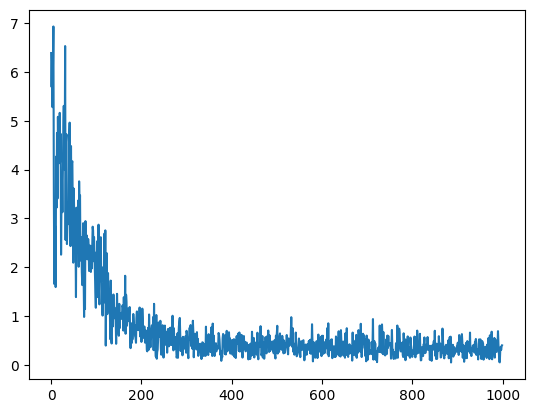

In [ ]:
stats = net.train(X, y, X, y,learning_rate=.1, batch_size = 10, num_epochs=1000, learning_rate_decay = .99, verbose=False)
## TODO: Plot ['loss_history'] here
## -- ! code required
#print("stats")
#print(stats['loss_history'])
plt.plot(stats['loss_history'])



---
# **Question 4:** Intro to PyTorch


## **Q4.0**: Pytorch Tutorial

This question will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in the this course.

Before starting the homework, we recommend you review this introductory tutorial on the PyTorch webpage: [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). If you get stuck on any implementation problems, please first refer to this guide or to the PyTorch documentation; the functions we use here are well documented across the internet. Otherwise, you are encouraged to post on Piazza if you have any further questions.

In [ ]:
import torch

## **Q4.1** A Simple Function

A [Tensor](https://pytorch.org/docs/stable/tensors.html) (`torch.tensor`) is the fundamental data structure of the PyTorch library. Tensors are multi-dimensional matrices similar to a NumPy array, except that they are designed to be run on GPUs. In PyTorch, tensors are used to encode model data and parameters.

`torch.autograd` is PyTorch's automatic differentiation engine, and is an essential tool for performing backpropagation.

Here, we will use this functionality to perform backpropagation on the simple function, $f = \sqrt z \cdot(x+y)$ with `torch.tensor` and `tensor.autograd`.


#### **Q4.1.1** Creating Tensors

Tensors can be initialized using the `torch.tensor()` method. We often set `requires_grad=True` when we create a tensor if we want to compute gradient with respect to it. (There are also situations that we perfer to set `requires_grad=False` to save computation time and memory).

Initialize three tensors `x`, `y`, and `z` that will be used as inputs to the function $f$. Set $x=-2$, $y=5$ and $z=4$ and set `requires_grad=True`.




In [ ]:
## -- ! code required
x = torch.tensor(np.array([-2.0]), requires_grad=True)
y = torch.tensor(np.array([5.0]), requires_grad=True)
z = torch.tensor(np.array([4.0]), requires_grad=True)

print(x)
print(y)
print(z)

tensor([-2.], dtype=torch.float64, requires_grad=True)
tensor([5.], dtype=torch.float64, requires_grad=True)
tensor([4.], dtype=torch.float64, requires_grad=True)


#### **Q4.1.2** Computation Graph
We present here a computation graph for our function $f = \sqrt z \cdot(x+y)$. The round nodes are input variables, the square nodes represent arithmetic operators, and the diamond node represents the output of the function. The two labeled arrows $g$ and $q$ are intermediate nodes (functions) of our graph.

Conceptually, `torch.autograd` maintains a similar datastructure as it performs forward and backward passes.


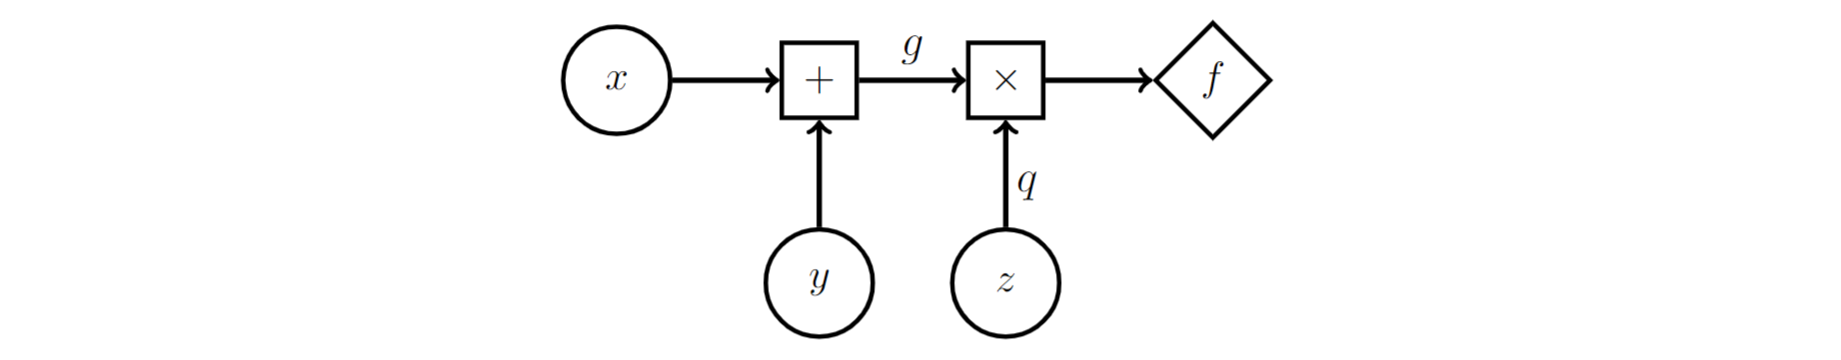

Following this computational graph, you are required to:

1.   Define three new variables: $$g=x+y \\ q=\sqrt z \\f= g \cdot q$$ Defining these intermediate functions here allows you to "communicate" with `torch.autograd`.

2.   Print `g`,`q`, and `f`. The second argument of these tensors could be different...think about whether it makes sense based on what the variable is and how you created it!

3.   Run `f.backward(retain_graph=True)` to compute the gradients of function $f$ w.r.t. $x,y,z$, respectively. The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it in order to free up some memory.

4.   Print the gradients of $f$ w.r.t. $x,y,z,q$. Note that the gradient for $q$ will be `None`. This is because $q$ was created as an intermediate node. (Note: to access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2).)

In [ ]:
## -- ! code required
g = x + y
q = torch.sqrt(z)
f = g * q
#print("g")
#print(g)
#print("q")
#print(q)
#print("f")
#print(f)
g.register_hook(print)
q.register_hook(print)
f.backward(retain_graph=True)
print("grads print")
print(x.grad)
print(y.grad)
print(z.grad)
print(g.grad)
print(q.grad)
print(f.grad)

tensor([3.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
grads print
tensor([2.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([0.7500], dtype=torch.float64)
None
None
None


<ipython-input-230-0d105b34fe53>:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(g.grad)
<ipython-input-230-0d105b34fe53>:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more

#### **Q4.1.3** `grad.zero_()` for Tensors

Notice that if we run the above cell again, it will add the new gradients to their previous values. Sometimes this is handy, but for now it's best to avoid this. The `grad.zero_()` method can be used to zero out the stored gradient for a tensor. Use this function on the tensors `x`, `y`, and `z` to ensure the gradients do not change even after running the same cell multiple times.

After using the `grad.zero_()` method, print the gradients of `x`, `y`, and `z`. Then, run `f.backward(retain_graph=True)` and print the new gradients for `x`, `y`, and `z`. Run this code cell a few times to ensure the gradients do not change!

In [ ]:
## -- ! code required
x.grad.zero_()
y.grad.zero_()
z.grad.zero_()
print(x.grad)
print(y.grad)
print(z.grad)
f.backward(retain_graph=True)
print(x.grad)
print(y.grad)
print(z.grad)

tensor([0.], dtype=torch.float64)
tensor([0.], dtype=torch.float64)
tensor([0.], dtype=torch.float64)
tensor([3.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([0.7500], dtype=torch.float64)


## **Q4.2** A Single Neuron

Now, we explore a function with a vector/matrix input and computing its gradient (think of this as a single neuron in a larger NN). We will implement the function $g(\mathbf{x}, \mathbf{w}) = f(\mathbf{w}^T \mathbf{x})$, where $f(z) = \sigma(z) = \frac{1}{1+e^{-x}}$. This is known as the **sigmoid** activation function, and is implemented in PyTorch as `torch.nn.functional.sigmoid` ([documentation](https://pytorch.org/docs/stable/generated/torch.nn.functional.sigmoid.html))

#### **Q4.2.1** Autograd

Initialize the input $\mathbf{x} =[-1, -2, 1]$ and the weights $ \mathbf{w}=[2, -3, -3]$, where $w_3$ is the bias. Print out the result of function $g$ with these intializations.

Next, run `g.backward()` and print the gradients of $g$ w.r.t. $\mathbf{w}, \mathbf{x}$.

In [ ]:
# Initialize x, w, and function g
## -- ! code required
x = torch.tensor([-1.0,-2.0,1.0],requires_grad=True)
w = torch.tensor([2.0,-3.0,-3.0],requires_grad=True)
g = torch.nn.functional.sigmoid(torch.matmul(w,x))

print(f'x = {x} \nw = {w} \ng(x, w)={g}\n')


# compute and print gradients
## -- ! code required
g.backward()
print("x.grad")
print(x.grad)
print("w.grad")
print(w.grad)


x = tensor([-1., -2.,  1.], requires_grad=True) 
w = tensor([ 2., -3., -3.], requires_grad=True) 
g(x, w)=0.7310585975646973

x.grad
tensor([ 0.3932, -0.5898, -0.5898])
w.grad
tensor([-0.1966, -0.3932,  0.1966])


#### **Q4.2.2** Verify Gradients

Derive $ \frac{\partial g}{ \partial \mathbf{x}} $ and  $ \frac{\partial g}{ \partial \mathbf{w}} $ by hand and evaluate for $\mathbf{x} =[-1, -2, 1]$ and the weights $ \mathbf{w}=[2, -3, -3]$. Use this to verify your results in 2.2.1.

**Hint:** Start with computing $\frac{\partial f}{ \partial z}$. You should be able to express this result in terms of $f(z)$. Then, use this result and the properties of the chain rule to compute $ \frac{\partial g}{ \partial \mathbf{x}} $ and  $ \frac{\partial g}{ \partial \mathbf{w}} $. You might find the printed line above for the value of $g$ is helpful.

#### <font color='blue'>**Q4.2.2 Solution**:</font>

$x = [-1, -2, 1]$

$w = [2, -3, -3]$

$ w^Tx = [2, -3, -3]^T [-1, -2, 1] = -2+6-3 = 1 $

$g(\mathbf{x}, \mathbf{w}) = f(\mathbf{w}^T \mathbf{x})$, where $f(z) = \sigma(z) = \frac{1}{1+e^{-x}}$

$$
g(x, w) = f(w^T x) = σ(w^Tx)\\
\frac{\partial g}{\partial x} = \frac{\partial σ(w^Tx)}{\partial x} \\
= σ(w^Tx)*(1-σ(w^Tx)) * \frac{\partial (w^Tx)}{\partial x} \\
= σ(w^Tx)*(1-σ(w^Tx)) * w^T \\
= σ(1)*(1-σ(1)) *  [2, -3, -3]^T\\
= \frac{1}{1+e^{-1}}*(1-\frac{1}{1+e^{-1}}) * [2, -3, -3]^T \\
= \frac{1}{1+.3679}*(1-\frac{1}{1+.3679}) * [2, -3, -3]^T \\
= .7310 * (1 - .731) * [2, -3, -3]^T \\
= .1966 * [2, -3, -3]^T \\
= [3932, -.5898, -.5898]
$$

.

$$
\frac{\partial g}{\partial w} = \frac{\partial σ(w^Tx)}{\partial w} \\
= σ(w^Tx)*(1-σ(w^Tx)) * \frac{\partial (w^Tx)}{\partial w} \\
= σ(w^Tx)*(1-σ(w^Tx)) * x \\
= σ(1)*(1-σ(1)) *  [-1, -2, 1]\\
= .1966 *  [-1, -2, 1]\\
= [-0.1966, -0.3932,  0.1966]\\
$$

## **Q4.3** Building Blocks in `torch.nn`

In Q4.2, we utilized `torch.nn.Sigmoid` for our activation function, rather than coding the sigmoid activation function from scratch. The motivation of using `torch.nn` is the same. Many useful functions and building blocks used to architect deep learning models are already implemented in `torch.nn`. A full catalog of included functions is available [here](https://pytorch.org/docs/stable/nn.html).

Using `torch.nn`, build the following model, which is a binary classifier:
\begin{align*}
g(\mathbf{x}) = f(\mathbf{w}^T \mathbf{x} + b )
\end{align*}
where $\mathbf{x}$ is the input data, $ \mathbf{w}$ is the weights, $b$ is the bias, and $f(z) = \sigma(z) = \frac{1}{1+e^{-x}}$ is the sigmoid activation function.
A building block to represent $\mathbf{w}^T \mathbf{x} + b$ is included in `torch.nn`. This is called a linear layer, and can be initialized using `torch.nn.Linear()`.

1.   Build the above model with weights $\mathbf{w}=[2, -3]$ bias $b=-3$.
2.   Initialize an input $\mathbf{x}=[-1, 2]$ (you don't need to set `requires_grad=True` for $\mathbf{x}$ because in the context of machine learning, we do not require the gradient with respect to data), and print the value of $g(\mathbf{x})$
3.   Compute the gradients $\frac{\partial g}{\partial \mathbf{w}}, \frac{\partial g}{\partial b}$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.)

**Check:** We built an equivlant model in Q4.2, so the outputs should match.

In [ ]:
import torch
import torch.nn as nn

# linear layer
## -- ! code required
lin = torch.nn.Linear(2,1) #input 2, output 1
#f = torch.nn.functional.sigmoid()

# initialize data and print output
## -- ! code required
x = torch.tensor([-1.0,-2.0],requires_grad=False)
w = torch.tensor([2.0,-3.0],requires_grad=True)
b = torch.tensor([-3.0],requires_grad=True)
#g.weight.data = w
#g.bias = b
with torch.no_grad():
    lin.weight.copy_(w)
    lin.bias.copy_(b)
output = torch.nn.functional.sigmoid(lin(x))
print(output)
print(lin)
print(lin.weight)
print(lin.bias)


# compute and print gradient
## -- ! code required
output.backward()
print("backward")
print(lin.weight.grad)
print(lin.bias.grad)


tensor([0.7311], grad_fn=<SigmoidBackward0>)
Linear(in_features=2, out_features=1, bias=True)
Parameter containing:
tensor([[ 2., -3.]], requires_grad=True)
Parameter containing:
tensor([-3.], requires_grad=True)
backward
tensor([[-0.1966, -0.3932]])
tensor([0.1966])


## **Q4.4** Creating a Module
 Now lets put these two functions (Linear and Sigmoid) together into a "module". Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you have not already.



#### **Q4.4.1**

Make a subclass of the `nn.Module` class, called `Neuron`. Set variables to the same values as Q4.3. You will need to define the `__init__()` and `forward()` methods.



In [ ]:
import torch.nn as nn

class Neuron(nn.Module):

    def __init__(self):
        super(Neuron, self).__init__()
        # w = torch.tensor([[2.0,-3.0]],requires_grad=True)
        # b = torch.tensor([-3.0],requires_grad=True)
        ## -- ! code required
        # self.lin = nn.Linear(2, 1)
        # with torch.no_grad():
        #     self.lin.weight.copy_(w)
        #     self.lin.bias.copy_(b)


        self.lin = nn.Linear(2, 1)
        self.lin.weight = nn.Parameter(torch.tensor([[2.0,-3.0]]))
        self.lin.bias = nn.Parameter(torch.tensor([-3.0]))

    def forward(self, x):
        ## -- ! code required
        x = nn.functional.sigmoid(self.lin(x))
        return x


#### **Q4.4.2**

Now create an of your `Neuron` class called `my_neuron` and run backpropagation on it. Print out the gradients again. Make sure you zero out the gradients first, by calling `.zero_grad()` function of the parent class. Even if you will not re-compute the backprop, it is good practice to do this every time to avoid accumulating gradient!

In [ ]:
## -- ! code required
x = torch.tensor([-1.0,-2.0],requires_grad=False)

neuron = Neuron()
print(neuron)

output = neuron(x)
print(output)

output.backward()
print("backward")
print(neuron.lin.weight.grad)
print(neuron.lin.bias.grad)

neuron.zero_grad()

Neuron(
  (lin): Linear(in_features=2, out_features=1, bias=True)
)
tensor([0.7311], grad_fn=<SigmoidBackward0>)
backward
tensor([[-0.1966, -0.3932]])
tensor([0.1966])


## **Q4.5**. Loss and SGD

 Now, lets train our neuron on some data. The code below creates a toy dataset containing a few inputs $x$ and outputs $y$ (a binary 0/1 label), as well as a function that plots the data and current solution.

w0 = 2.0 w1 = -3.0 bias = -3.0


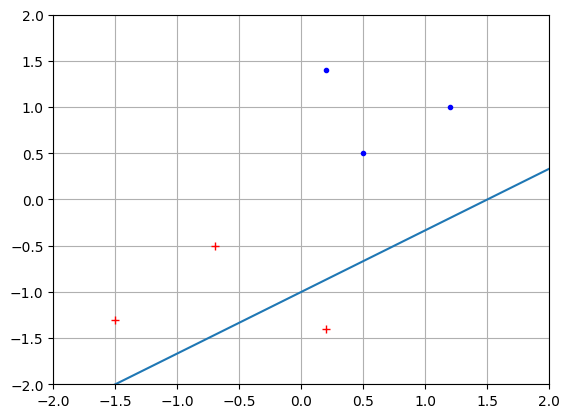

In [ ]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])
y = torch.tensor([0, 0, 0, 1, 1, 1 ])

def plot_soln(x, y, params):
  plt.plot(x[y==1,0], x[y==1,1], 'r+')
  plt.plot(x[y==0,0], x[y==0,1], 'b.')
  plt.grid(True)
  plt.axis([-2, 2, -2, 2])

  # NOTE : This may depend on how you implement Neuron.
  #   Change accordingly
  w0 = params[0][0][0].item()
  w1 = params[0][0][1].item()
  bias = params[1][0].item()

  print("w0 =", w0, "w1 =", w1, "bias =", bias)
  dbx = torch.tensor([-2, 2])
  dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
  plt.plot(dbx, dby)

params = list(neuron.parameters())
plot_soln(x, y, params)

#### **Q4.5.1**

Declare an object `criterion` of type `nn.CrossEntropyLoss`. Note that this can be called as a function on two tensors, one representing the network outputs and the other, the targets that the network is being trained to predict, to return the loss. Print the value of the loss on the dataset using the initial weights and bias defined above in Q4.2.

In [ ]:
## -- ! code required
neuron = Neuron()
output = neuron.forward(x)
print(output)
print(y)
criterion = nn.CrossEntropyLoss()
loss = criterion(torch.cat((output, 1-output),1), y)
print(loss)

tensor([[0.0266],
        [0.0011],
        [0.0293],
        [0.1091],
        [0.8320],
        [0.0522]], grad_fn=<SigmoidBackward0>)
tensor([0, 0, 0, 1, 1, 1])
tensor(0.9426, grad_fn=<NllLossBackward0>)


#### **Q4.5.2**

Print out the chain of `grad_fn` functions backwards starting from `loss.grad_fn`  to demonstrate what backpropagation will be run on.

In [ ]:
## -- ! code required
print(loss.grad_fn)
print(output.grad_fn)


#### **Q4.5.3**

Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` package to train your classifier on the toy dataset. Use the entire dataset in each batch. Use a learning rate of $0.01$ (no other hyperparameters). You will need to write a training loop that uses the `.step()` function of the optimizer. Plot the solution and print the loss after 1000 iterations.

loss = 0.3273821175098419
w0 = 4.141496658325195 w1 = 2.4262382984161377 bias = -0.8129551410675049


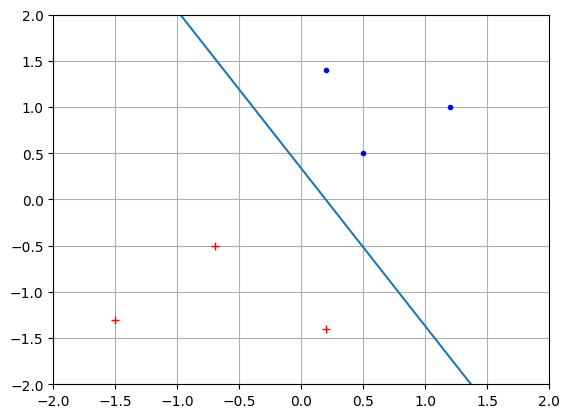

In [ ]:
import torch.optim as optim

neuron = Neuron()
# create your optimizer
optimizer = optim.SGD(neuron.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# training loop
for i in range(10000):
  ## -- ! code required
  optimizer.zero_grad()
  output = neuron(x)
  loss = criterion(torch.cat((output, 1-output),1), y)
  loss.backward()
  optimizer.step()

print("loss =", loss.item())
params = list(neuron.parameters())
plot_soln(x, y, params)

#### **Q4.5.4**

How many thousands of iterations does it take (approximately) until the neuron learns to classify the data correctly?

#### <font color='blue'>**Q4.5.4 Solution**:</font>
10,000 iterations

## **Q4.6**. Hidden space ablation

Now let's look at the size of network's hidden space. We will create and train a **2-layer MLP** network on the [SVHN Dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.SVHN.html).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](https://www.researchgate.net/profile/Georgios-Drainakis/publication/346718116/figure/fig2/AS:966456476987393@1607432588092/Representation-of-SVHN-dataset.ppm)

In the below code, we first download the SVHN dataset from `torchvision.datasets`. We then apply greyscaling and normalization using the `torchvision.transforms` library. Finally, we configure a dataloader that will be used during the training loop.

**Note:** This question loosely follows the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial. Feel free to reference it if you get stuck.


Using downloaded and verified file: ./data/train_32x32.mat
    3     4     9     2


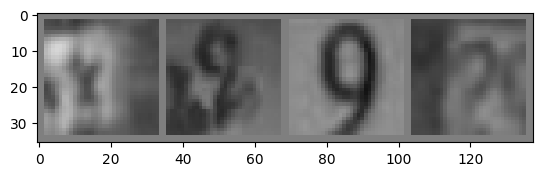

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# initialize transformations
transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

# configure dataloader
trainset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')



# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### **Q4.6.1** 2-layer MLP

Next, we will train a 2-layer MLP on the data. We have defined a simple 2-layer MLP for you with two fully connected (linear) layers and ReLU activation. Note the variable `hidden_size` in the model, which we will tune to achieve optimal results.



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Neuron(nn.Module):
    def __init__(self, hidden_size):
        super(Neuron, self).__init__()
        self.l1 = nn.Linear(1024, hidden_size)
        self.l2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 1024)
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

You can check the number of parameters in the model by printing out the model summary.

In [ ]:
def model_summary(model):
  print("model_summary")
  print()
  print("Layer_name"+"\t"*7+"Number of Parameters")
  print("="*100)
  model_parameters = [layer for layer in model.parameters() if layer.requires_grad]
  layer_name = [child for child in model.children()]
  j = 0
  total_params = 0
  print("\t"*10)
  for i in layer_name:
    print()
    param = 0
    try:
      bias = (i.bias is not None)
    except:
      bias = False
    if not bias:
      param =model_parameters[j].numel()+model_parameters[j+1].numel()
      j = j+2
    else:
      param =model_parameters[j].numel()
      j = j+1
    print(str(i)+"\t"*3+str(param))
    total_params+=param
  print("="*100)
  print(f"Total Params:{total_params}")

my_neuron = Neuron(10)
model_summary(my_neuron)

model_summary

Layer_name							Number of Parameters
										

Linear(in_features=1024, out_features=10, bias=True)			10240

Linear(in_features=10, out_features=10, bias=True)			10
Total Params:10250


Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

**Use GPU in Colab**: click *Runtime* in the menu bar -> click *Change runtime type* -> select *T4 GPU*

In [ ]:
# solution here
import torch
import torch.optim as optim

# initialize criterion and optimizer
criterion = torch.nn.CrossEntropyLoss() ## -- ! code required
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001, momentum=0.9) ## -- ! code required

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if we set the hardware to GPU in the Notebook settings, this should print a CUDA device:
print(device)

my_neuron.to(device)

cuda:0


Neuron(
  (l1): Linear(in_features=1024, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
)

#### **Q4.6.2** Training

Complete the training loop that makes five full passes through the dataset (five epochs) using SGD. Your batch size should be 4 and hidden size is 10.

In [ ]:
my_neuron = Neuron(10).to(device)

# reinitialize criterion and optimizer
criterion = torch.nn.CrossEntropyLoss() ## -- ! code required
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001, momentum=0.9) ## -- ! code required

# List to keep track of losses
stats = []

# Train for 5 epochs
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device) # Send to gpu

    ## -- ! code required

    optimizer.zero_grad()
    output = my_neuron(inputs)
    # guess = torch.max(output,dim = 1)
    # guessfloat = guess[1].float()
    # print(output)
    # print(guessfloat)
    # print(guessfloat.dtype)
    # print(labels)
    loss = criterion(output, labels)
    #new_loss = criterion(torch.cat((output, 1-output),1), labels)
    #print(loss)
    #print(new_loss)
    #running_loss = criterion(guess[1].float(), labels.float())
    loss.backward()
    optimizer.step()



    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 2.189
[1,  4000] loss: 1.900
[1,  6000] loss: 1.643
[1,  8000] loss: 1.493
[1, 10000] loss: 1.425
[1, 12000] loss: 1.377
[1, 14000] loss: 1.314
[1, 16000] loss: 1.305
[1, 18000] loss: 1.290
[2,  2000] loss: 1.268
[2,  4000] loss: 1.254
[2,  6000] loss: 1.265
[2,  8000] loss: 1.287
[2, 10000] loss: 1.267
[2, 12000] loss: 1.253
[2, 14000] loss: 1.259
[2, 16000] loss: 1.268
[2, 18000] loss: 1.267
[3,  2000] loss: 1.240
[3,  4000] loss: 1.233
[3,  6000] loss: 1.243
[3,  8000] loss: 1.255
[3, 10000] loss: 1.220
[3, 12000] loss: 1.213
[3, 14000] loss: 1.221
[3, 16000] loss: 1.266
[3, 18000] loss: 1.204
[4,  2000] loss: 1.221
[4,  4000] loss: 1.200
[4,  6000] loss: 1.216
[4,  8000] loss: 1.220
[4, 10000] loss: 1.213
[4, 12000] loss: 1.223
[4, 14000] loss: 1.209
[4, 16000] loss: 1.203
[4, 18000] loss: 1.187
[5,  2000] loss: 1.200
[5,  4000] loss: 1.204
[5,  6000] loss: 1.211
[5,  8000] loss: 1.229
[5, 10000] loss: 1.207
[5, 12000] loss: 1.183
[5, 14000] loss: 1.182
[5, 16000] 

Train the model again, but this time set the hidden size as 100.

In [ ]:
my_neuron_large = Neuron(100).to(device)

# reinitialize criterion and optimizer
criterion = torch.nn.CrossEntropyLoss() ## -- ! code required
optimizer = optim.SGD(my_neuron_large.parameters(), lr=0.01) ## -- ! code required

# List to keep track of losses
stats_v2 = []

# Train for 5 epochs
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device) # Send to gpu

    ## -- ! code required
    optimizer.zero_grad()
    output = my_neuron_large(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()



    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats_v2.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 2.147
[1,  4000] loss: 1.681
[1,  6000] loss: 1.399
[1,  8000] loss: 1.228
[1, 10000] loss: 1.139
[1, 12000] loss: 1.126
[1, 14000] loss: 1.035
[1, 16000] loss: 1.011
[1, 18000] loss: 0.964
[2,  2000] loss: 0.917
[2,  4000] loss: 0.894
[2,  6000] loss: 0.904
[2,  8000] loss: 0.893
[2, 10000] loss: 0.858
[2, 12000] loss: 0.839
[2, 14000] loss: 0.835
[2, 16000] loss: 0.811
[2, 18000] loss: 0.806
[3,  2000] loss: 0.769
[3,  4000] loss: 0.756
[3,  6000] loss: 0.750
[3,  8000] loss: 0.739
[3, 10000] loss: 0.773
[3, 12000] loss: 0.754
[3, 14000] loss: 0.734
[3, 16000] loss: 0.717
[3, 18000] loss: 0.727
[4,  2000] loss: 0.677
[4,  4000] loss: 0.686
[4,  6000] loss: 0.690
[4,  8000] loss: 0.686
[4, 10000] loss: 0.692
[4, 12000] loss: 0.656
[4, 14000] loss: 0.693
[4, 16000] loss: 0.687
[4, 18000] loss: 0.681
[5,  2000] loss: 0.655
[5,  4000] loss: 0.657
[5,  6000] loss: 0.657
[5,  8000] loss: 0.645
[5, 10000] loss: 0.665
[5, 12000] loss: 0.624
[5, 14000] loss: 0.643
[5, 16000] 

#### **Q4.6.3**
Plot the loss curve during training for the two hidden size configurations.
Compare the performance between the two configurations, and describe what you can learn from the plot.

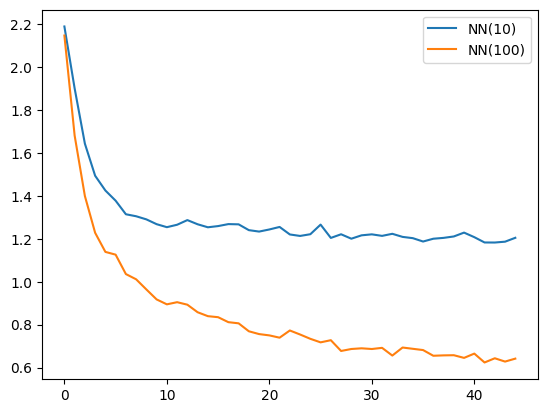

In [ ]:
## -- ! code required
import matplotlib.pyplot as plt
#print(stats.item())
#print(stats_v2.item())
# statsplot = np.zeros(len(stats))
# for i in range(statsplot.shape[0]):+
#     statsplot[i] = stats[i].item()
# stats_v2plot = np.zeros(len(stats_v2))
# for i in range(stats_v2plot.shape[0]):
#     stats_v2plot[i] = stats_v2[i].item()
plt.plot(stats, label='NN(10)')
plt.plot(stats_v2, label='NN(100)')
plt.legend()
plt.show()


#### <font color='blue'>**Q4.6.3 Solution**:</font>

The larger sized hidden layer neural network reaches a lower loss much more quickly than the 10 layer network.
This helps to create a better fitting model, at the expense of significant extra computation time